# load

In [128]:
using CSV
using DataFrames
smut = CSV.read("SMutList.txt", delim="\t")
data0 = smut[1,:]
data0[:Mut] = "WT"
ns = names(smut)
for (n1,n2) in zip(ns[2:7], ns[8:13])
    data0[n1] = data0[n2]
end
smut = vcat(data0, smut)
delete!(smut, [:Pos; ns[8:13]])
dmut = CSV.read("DMutList.txt", delim="\t")
delete!(dmut, ns[8:13])

data = vcat(smut, dmut)
data[:f] = log.((data[:SelAll].+0.5)./(data[:DNA].+.5)/(data[:SelAll][1]+0.5)*(data[:DNA][1]+.5))
data[:v] = (data[:DNA].+data[:SelAll].+1)./((data[:SelAll].+0.5).*(data[:DNA].+.5))
data[:v][2:end] .+= data[:v][1]
datacsv = data[:,[:Mut, :f, :v]]

,Mut,f,v
1,WT,0.0,8.97056e-7
2,T15R,0.00434018,1.57133e-5
3,T15S,-0.572847,2.93301e-5
4,T15P,-0.861294,2.69867e-5
5,T15Q,-0.362012,4.59783e-5
6,T15V,-0.303619,3.19153e-5
7,T15W,-1.1926,7.43209e-5
8,T15Y,-0.941751,0.000158704
9,T15C,-0.615523,0.000114685
10,T15A,-0.818151,6.15079e-5


In [129]:
data = prepdata(datacsv, :Mut, :listofmuts, "WT", :f, vname = :v)

Dict{Symbol,Any} with 9 entries:
  :ham  => [0, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
  :wt   => "WT"
  :pos  => [15, 15, 15, 15, 15, 15, 15, 15, 15, 15  …  43, 43, 43, 43, 43, 43, …
  :aa   => ['R', 'S', 'P', 'Q', 'V', 'W', 'Y', 'C', 'A', 'F'  …  'F', 'A', 'N',…
  :y    => [0.0, 0.00434018, -0.572847, -0.861294, -0.362012, -0.303619, -1.192…
  :code => Dict("G40L"=>148,"E26K"=>415,"T15D"=>13,"K9M"=>516,"D35H"=>64,"T48P"…
  :v    => [8.97056e-7, 1.57133e-5, 2.93301e-5, 2.69867e-5, 4.59783e-5, 3.19153…
  :g    => Bool[false, true, true, true, true, true, true, true, true, true  … …
  :x    => …

## precomputed models

In [134]:
using JLD
@load "inferred.jld"

9-element Array{Symbol,1}:
 :data         
 :dl_lin_nonlin
 :dl_m01_m11   
 :dl_m10_m1011 
 :m            
 :m01          
 :m10          
 :mb           
 :mlin         

## plotting libraries

In [9]:
using RCall
R"""
library(tidyverse)
library(cowplot)
options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width=600, height=600, ...))
""";

INFO: Recompiling stale cache file /Users/jakub/.julia/lib/v0.6/RCall.ji for module RCall.
Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# non-epistatic model

In [131]:
@time mlin = nonepistatic_model(data)

 68.547337 seconds (770.96 k allocations: 4.630 GiB, 0.87% gc time)


Dict{Symbol,Any} with 11 entries:
  :b            => [-0.159505, -0.0501227, -0.566428, -1.14904, -0.367226, -0.2…
  :r2           => 0.861466
  :prediction   => 536963×2 DataFrames.DataFrame…
  :phi          => [-0.159505, -0.209628, -0.725933, -1.30854, -0.526731, -0.41…
  :yhat         => [-0.159505, -0.209628, -0.725933, -1.30854, -0.526731, -0.41…
  :sigma2       => 0.301185
  :data         => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 1, 1, 1, 1, 1, 1…
  :nlopt_return => :SUCCESS
  :rmse         => 0.853351
  :beta         => 1045×3 DataFrames.DataFrame…
  :ll           => -96931.5

## prediction vs observed

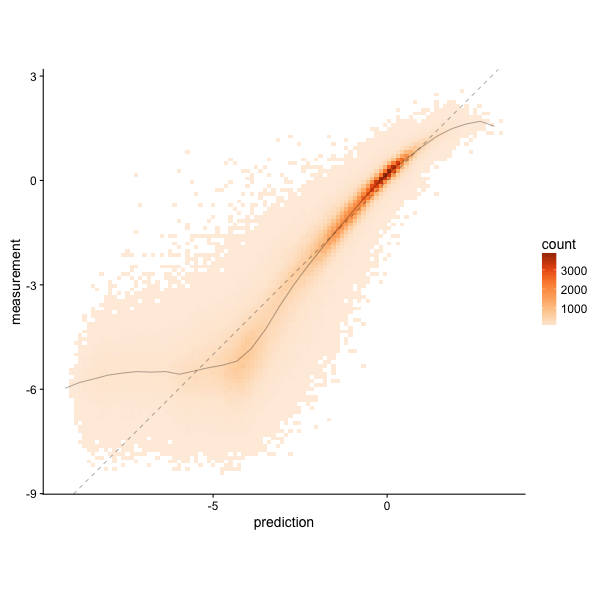

RCall.RObject{RCall.VecSxp}


In [135]:
R"""
plot.model.linear = qplot(x=$(mlin[:yhat]), y=$(data[:y]), geom="bin2d", bins=100) +
geom_abline(alpha=0.3, linetype=2) + coord_fixed() +
scale_fill_distiller(palette=7, direction=1) +
xlab("prediction") + ylab("measurement") +
stat_summary_bin(geom="line", fun.y=mean, alpha=0.3)
"""

## cross-validate
should take a long time

In [ ]:
cvyhatmlin = cvpredict(data, nonepistatic_model, 10)

# global epistasis

## fit

In [ ]:
@time m = fit(mlin, nk = 4, tol = 1e-14)

## write parameters in csv

In [121]:
beta = DataFrame(b = m[:bg], pos=data[:pos], aa=data[:aa])
CSV.write("beta.csv", beta)
pred = DataFrame(y = data[:y], yhat = m[:yhat], phi = m[:phiG])
CSV.write("predictions.csv", pred)

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "predictions.csv", 11, true, String["y", "yhat", "phi"], 3, false, Val{false})

## bootstrap
caution: this will take a very long time

In [ ]:
mb = boot(m, 1000);

In [30]:
b_boot, a_boot, g_boot = boot_stats(m, mb)

"beta 1045, positive 234, deleterious 774, neutral 37 "

"beta average 95% CI width 0.19379490542193323"

"beta average SE, 0.003722268113447721"

"g(phi) average CI 0.21019412943924834"

"g(phi) boundary [-4.52319, 2.55573]"

"g(phi) second deriv+ CI (-4.16924456023316, -1.0545192413520907)"

"g(phi) second deriv- CI (-0.9837300295593391, 1.6354708067724697)"

(1045×9 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row  │ name │ med        │ upper      │ lower      │ se          │
├──────┼──────┼────────────┼────────────┼────────────┼─────────────┤
│ 1    │ 10C  │ -0.0849971 │ -0.0650773 │ -0.103403  │ 0.000311684 │
│ 2    │ 10F  │ -0.119399  │ -0.0990364 │ -0.13973   │ 0.000323735 │
│ 3    │ 10W  │ -0.045014  │ -0.0238378 │ -0.0634708 │ 0.000328206 │
│ 4    │ 10Q  │ -0.110039  │ -0.0881821 │ -0.131046  │ 0.000331449 │
│ 5    │ 10I  │ -0.050908  │ -0.0329292 │ -0.0692737 │ 0.000303669 │
│ 6    │ 10E  │ -0.202978  │ -0.181221  │ -0.224194  │ 0.000354725 │
│ 7    │ 10Y  │ -0.088103  │ -0.0700624 │ -0.106725  │ 0.000304502 │
│ 8    │ 10M  │ -0.25912   │ -0.234142  │ -0.282753  │ 0.000399522 │
│ 9    │ 10P  │ -0.48369   │ -0.444068  │ -0.515275  │ 0.000573916 │
│ 10   │ 10H  │ -0.0440192 │ -0.0251387 │ -0.0634013 │ 0.000312253 │
│ 11   │ 10T  │ -0.0727247 │ -0.054372  │ -0.0906716 │ 0.000301104 │
⋮
│ 1034 │ 9K   │ -0.991399  │ -0.921007  │

## cross-validate
should take a long time

In [ ]:
cvyhat = cvpredict(data, fit, 10, nk=4, tol=1e-14)

## plot non-linear curve

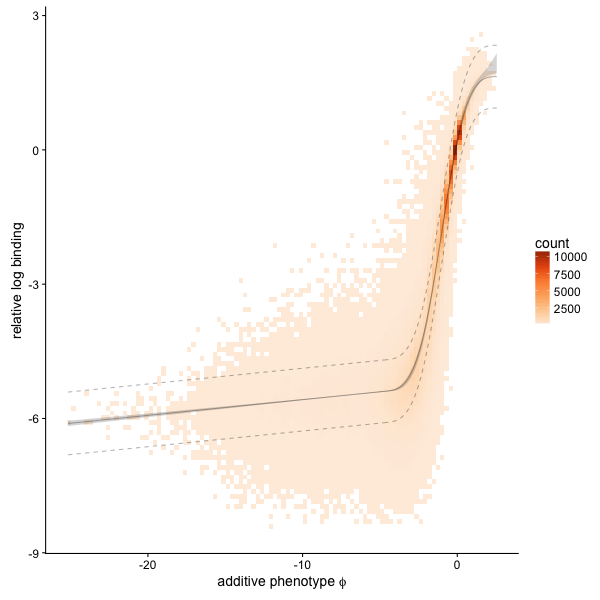

RCall.RObject{RCall.VecSxp}


In [136]:
sigmaep = sqrt(m[:sigma2])
R"""
qplot(x=$(m[:phiG]), y=$(data[:y]), geom = "bin2d", bins=100) +
scale_fill_distiller(palette=7, direction=1) + 
geom_line(aes(y=yhat, x=phiG), $g_boot, alpha = 0.3) + 
geom_ribbon(aes(x=phiG, ymin = yhat_lower, ymax = yhat_upper), $g_boot, alpha=0.2, inherit.aes=FALSE) +
geom_line(aes(y=yhat+2*$sigmaep, x=phiG), $g_boot, alpha=0.3, linetype=2) + 
geom_line(aes(y=yhat-2*$sigmaep, x=phiG), $g_boot, alpha=0.3, linetype=2) + 
xlab(expression(paste("additive phenotype ", phi))) +
ylab("relative log binding")
"""

## plot beta

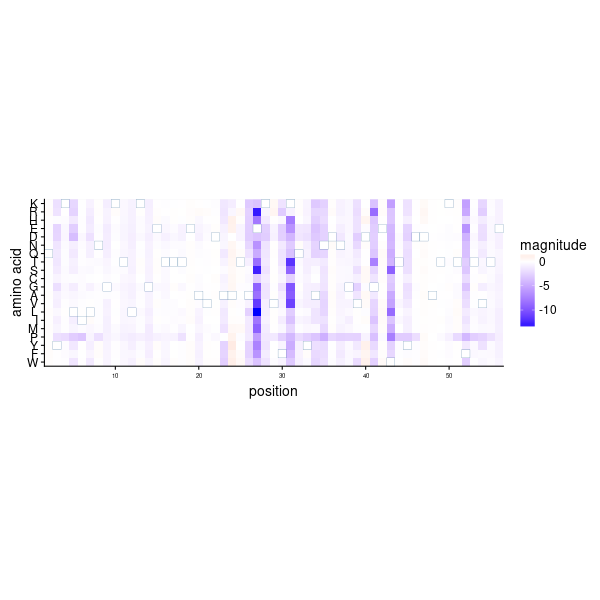

RCall.RObject{RCall.VecSxp}


In [17]:
aalev = reverse(["K", "R", "H", "E", "D", "N","Q","T","S","C","G","A","V","L","I","M","P", "Y", "F", "W"])
R"""
beta = data.frame(b=$(m[:bg]), pos=$(data[:pos]), aa = factor($(data[:aa]), levels=$aalev))
library(stringr)
wt = data.frame(aa = str_split("QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE", "")[[1]], pos=2:56)

plot.Gb = qplot(data=beta, x=pos, y=aa, fill=b, geom="tile") +
scale_fill_gradient2(high="red", low="blue") +
geom_tile(aes(x=pos, y=aa, color=0.0, fill=0), wt) + scale_color_continuous(guide="none") +
coord_fixed(expand=FALSE) +
#scale_x_continuous(breaks=seq(min($bd$pos), max($bd$pos), 5)) +
ylab("amino acid") +
xlab("position") +
labs(fill = "magnitude") + 
theme(panel.grid = element_blank(), panel.background = element_rect(fill = "grey95", color="grey95"),
    axis.text.x = element_text(size=6))
"""

## plot densities

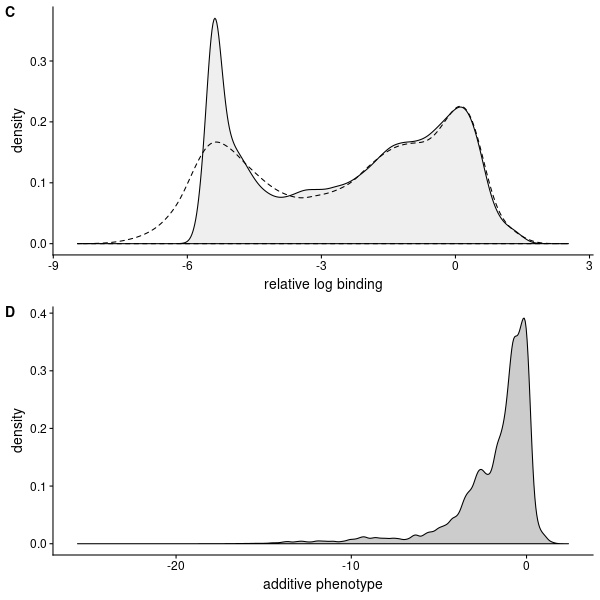

RCall.RObject{RCall.VecSxp}


In [18]:
R"""
plot_grid(

qplot(x=$(m[:yhat]), alpha=I(0.3), xlab = "relative log binding", 
    geom="density", fill=I("grey80")) + geom_density(aes(x=$(data[:y])), linetype=2), 

qplot(x=$(m[:phiG]), xlab = "additive phenotype", geom="density", fill=I("grey80")),
    nrow=2, labels=c("C","D"))
"""

## compare betas nonepi and global

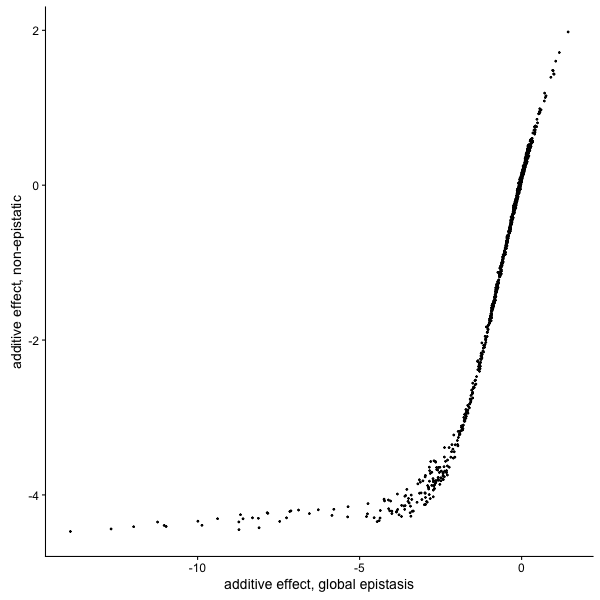

RCall.RObject{RCall.VecSxp}


In [28]:
R"""
qplot(x=$(m[:bg]), y=$(mlin[:b][2:end]), size=I(.5)) +
 ylab("additive effect, non-epistatic") + xlab("additive effect, global epistasis")
"""

## stabilities DDG

RCall.RObject{RCall.VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$bstab$b and `#JL`$bstab$ddg
t = 1.5173, df = 80, p-value = 0.1331
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05162748  0.37080226
sample estimates:
      cor 
0.1672535 



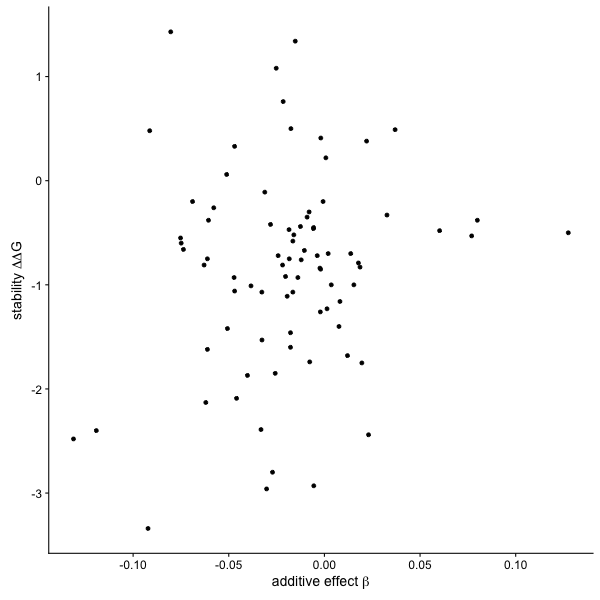

RCall.RObject{RCall.VecSxp}


In [25]:
using DataFrames
using CSV
stab = CSV.read("stabilities.csv")
bd = DataFrame(aa = data[:aa], pos = data[:pos], b = m[:b][2:end])

stab[:pos] = [parse(Int64, match(r"\d+", bn).match) for bn in stab[:mutation]]
stab[:aa] = [match(r"(?<=\d)[A-Z]|\*", bn).match for bn in stab[:mutation]]

bstab = join(stab, bd, on = [:pos, :aa], kind = :inner)

display(R"cor.test($bstab$b, $bstab$ddg)")

R"""
plot.ddg = qplot(x=$(bstab[:b]), y=$(bstab[:ddg])) +
xlab(expression(paste("additive effect ", beta))) +
ylab(expression(paste("stability ", Delta, Delta, "G")))
"""

## plot bootstrapped betas

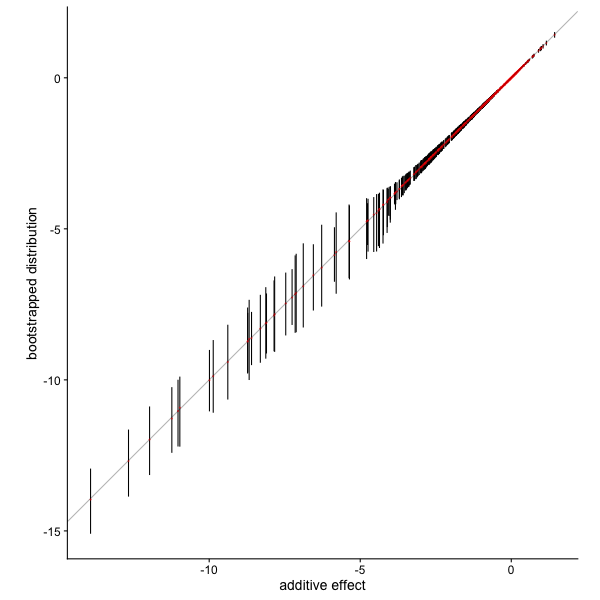

RCall.RObject{RCall.VecSxp}


In [31]:
R"""

qplot(data=$b_boot, x=b, y=med, ymin = lower, ymax=upper, size=I(.5),
geom="linerange", xlab="additive effect", ylab="bootstrapped distribution") +
geom_point(size=0.2, alpha=0.5, color="red") + geom_abline(alpha=0.3) +
coord_fixed()
"""

# hypothesis tests

## nonepistatic vs global

In [ ]:
dl_lin_nonlin = lrt(1000, mlin, 
            m -> boot(m), 
            m -> fit(m))
mean(dl_lin_nonlin .> m[:ll]-mlin[:ll])

## test slopes = 0

In [ ]:
@time m10 = fit(mlin, a_upper_bound = [Inf, 0.0], tol=1e-12)
@time m01 = fit(mlin, a_upper_bound = [0.0, Inf], tol=1e-12)
m11 = fit(m10, a_upper_bound=[Inf, Inf], tol=1e-12)

In [ ]:
dl_m10_m1011 = lrt(1000, m10, 
            m -> boot(m, tol=1e-12), 
            m -> fit(m, a_upper_bound=[Inf, Inf], tol=1e-12))
mean(dl_m10_m1011 .> m11[:ll]-m10[:ll])

In [ ]:
dl_m01_m11 = lrt(1000, m01, 
            m -> boot(m, tol=1e-11), 
            m -> fit(m, a_upper_bound=[Inf, Inf], tol=1e-11))
mean(dl_m01_m11 .> m11[:ll]-m01[:ll])

# Wu four sites data

## load

In [139]:
using DataFrames
using CSV
d = CSV.read("wu4sites.txt", delim="\t")
delete!(d, [:I10fit, :I20fit, :I20fitRaw, :I90fit, :AOfit])
d = stack(d, 4:6)
d[:Input] = d[:Input] + .5
d[:value] = d[:value] + .5
d[:f] = log.(d[:value]./d[:Input])#*d[:Input][1]/338347)
d[:v] = (d[:value].+d[:Input])./(d[:value].*d[:Input])
rename!(d, :variable => :concentration, :value => :Selected)
for s in unique(d[:concentration])
    wti = (d[:concentration] .== s) .& (d[:HD] .== 0)
    nwti = (d[:concentration] .== s) .& (d[:HD] .!= 0)
    d[:v][nwti] += d[:v][wti][1]
    d[:f][d[:concentration] .== s] -= d[:f][wti][1]
end
sort!(d, :Input, rev = true)
datawu = d[d[:concentration] .== :IGG20,[:mut, :f, :v]]
# filter out stops
datawu = datawu[.!ismatch.(r"_", datawu[:mut]), :]


,mut,f,v
1,VDGV,0.0,1.37389e-5
2,WVRL,-4.59976,0.00146669
3,RVRS,-5.85721,0.00515589
4,RVLS,-4.99577,0.00226333
5,RVGL,-0.196015,8.6226e-5
6,WVVL,-5.19691,0.00277474
7,WVGL,-0.441787,9.27755e-5
8,WVRS,-4.1681,0.00106549
9,RVLP,-5.39666,0.00350099
10,WVVS,-5.10007,0.00262483


In [88]:
wu = predict(m, datawu[:mut], :sequence, wt = "VDGV", pos = [39:41; 54].-1)
wu[:y] = datawu[:f];

## plot curve

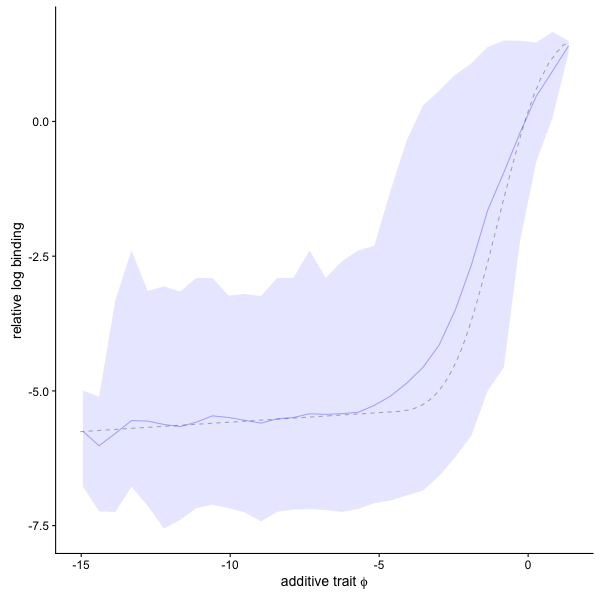

RCall.RObject{RCall.VecSxp}


In [89]:
sigmaep = sqrt(m[:sigma2])
R"""
library(dplyr)
ggplot(data=$wu, aes(x=phiG, y=yhat)) +
stat_summary_bin(fun.y = "mean", geom = "line", bins=200, alpha=0.3, linetype=I(2)) +
#geom_ribbon(aes(ymin=yhat-$(2*sigmaep), ymax=yhat+$(2*sigmaep)), fill="red", alpha=0.1) +
stat_summary_bin(aes(x=phiG, y=y), geom="line", fun.y=mean, alpha=0.3, color="blue") +
stat_summary_bin(aes(x=phiG, y=y), geom="ribbon", bins=30, alpha=0.1, fill="blue", 
    fun.data = function(x) data_frame(ymin=quantile(x, 0.0275), ymax=quantile(x, 0.97725))) +
xlab(expression(paste("additive trait ", phi))) +
ylab("relative log binding")
"""

## plot z score distribution

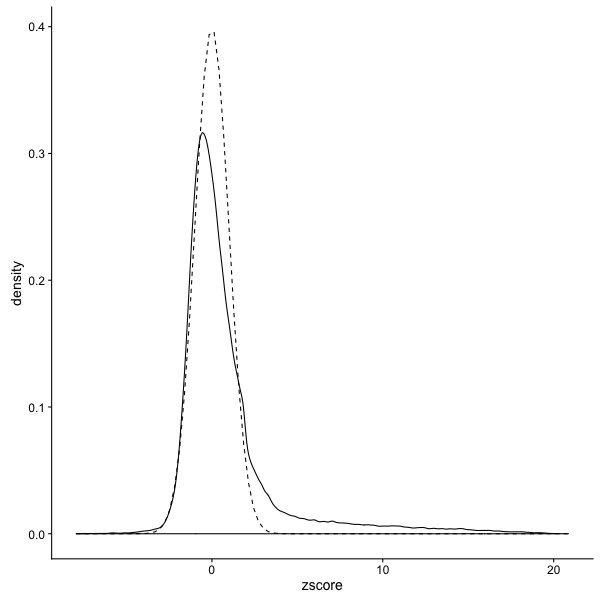

RCall.RObject{RCall.VecSxp}


In [94]:
z = (wu[:y] .- wu[:yhat])./sqrt.((m[:sigma2]+datawu[:v]))

R"""
qplot(x=$z, geom = "density") +
    stat_function(fun = dnorm, linetype=2) + labs(x="zscore")
"""

## marginalize z-scores over pairs

In [104]:
function pairdeviations(data, z)
    x = data[:x]
    dout = DataFrame(name1 = String[], name2 = String[], 
        mean = Float64[], msd= Float64[])
    for (ni, i) in data[:code]
        for (nj, j) in data[:code]
            if ni > nj
                xdub = x[:,i] .* x[:,j]
                ndub = sum(xdub)
                if ndub > 0
                    msd = sum(z.^2.*xdub)/ndub
                    ym = sum(z.*xdub)/ndub
                    append!(dout,
                    DataFrame(name1= string(ni), name2= string(nj), 
                        mean=ym, msd = msd))
                end
            end
        end
    end
    sort!(dout, [:name1,:name2])
    return dout
end
dwu = prepdata(datawu, :mut, :sequence, "VDGV", :f, vname = :v)
pairdev = pairdeviations(dwu, z)

,name1,name2,mean,msd
1,G3A,D2A,1.35002,16.7362
2,G3A,D2C,2.76642,18.8799
3,G3A,D2E,1.17612,13.5461
4,G3A,D2F,0.933825,16.307
5,G3A,D2G,0.427298,9.3396
6,G3A,D2H,1.81592,20.3157
7,G3A,D2I,2.83002,31.2961
8,G3A,D2K,2.17405,24.2665
9,G3A,D2L,1.19764,16.2526
10,G3A,D2M,1.31185,16.0086


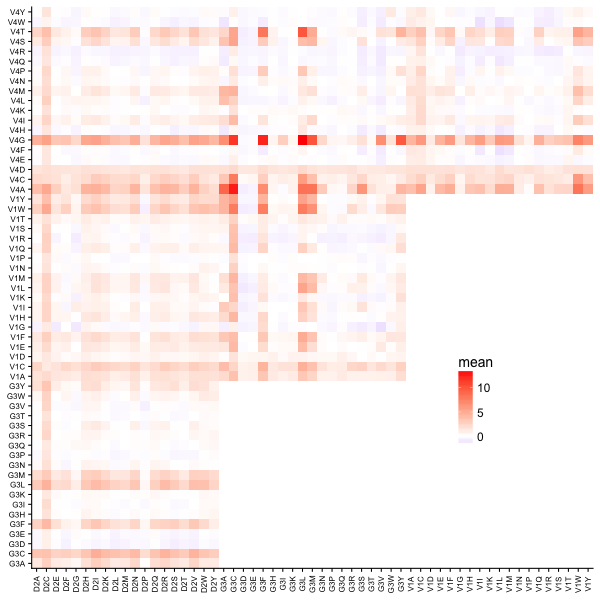

RCall.RObject{RCall.VecSxp}


In [105]:
R"""
plot.pairdev = qplot(data=$pairdev, x=name2, y=name1, fill=mean, geom="tile") +
    theme(axis.text.x = element_text(angle=90, vjust=0.5, size=8), 
        axis.text.y = element_text(size=8), axis.title = element_blank(),
        legend.position=c(.75,.3)) +
    coord_fixed(expand=FALSE) +
    scale_fill_gradient2(high="red", low="blue") 

"""